## CIFAR 10

Initial attempt to get cifar10 to converge faster following Leslie Smith's 2 papers:
* Superconvergence - https://arxiv.org/abs/1708.07120
* Neural network hyperparameters - https://arxiv.org/abs/1803.09820

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
PATH = "data/cifar10/"
os.makedirs(PATH,exist_ok=True)

### Load classes

In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [4]:
def get_data(sz,bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlip()], pad=sz//8)
    return ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

In [5]:
bs=128

## Initial model

In [5]:
from fastai.models.cifar10.resnext import resnext29_8_64

m = resnext29_8_64()
bm = BasicModel(m.cuda(), name='cifar10_rn29_8_64')

In [85]:
data = get_data(8,512)

In [86]:
learn = ConvLearner(data, bm)
learn.unfreeze()

In [39]:
# lr=5e-1; wd=1e-4
lr=7e-1; wd=5e-4

In [40]:
%time learn.fit(lr, 1, cycle_len=6, use_clr=(20, 2), wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

 10%|█         | 10/98 [00:08<01:13,  1.20it/s, loss=6]   


Exception in thread Thread-11:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                 
    0      2.25655    1.744049   0.39259   
    1      1.664328   1.479018   0.467348                 
    2      1.484946   1.445946   0.471858                 
    3      1.352592   1.289069   0.540941                 
    4      1.203896   1.189509   0.577235                 
    5      1.049313   0.973695   0.654917                 

CPU times: user 6min 50s, sys: 1min 53s, total: 8min 43s
Wall time: 7min 20s


[0.9736945, 0.6549172788858414]

In [41]:
learn.save('test2_8x8_8')

In [87]:
learn.load('test2_8x8_8')

In [88]:
lr=1; wd=5e-4
learn.unfreeze()

In [89]:
learn.set_data(get_data(16,512))

In [ ]:
%time learn.fit(lr, 6, cycle_len=1, use_clr=(10, 2), wds=wd)

### TEst 2

In [91]:
from fastai.models.cifar10.resnext import resnext29_8_64

m = resnext29_8_64()
bm = BasicModel(m.cuda(), name='cifar10_rn29_8_64')

In [92]:
data = get_data(8,512)

In [93]:
learn = ConvLearner(data, bm)
learn.unfreeze()

In [95]:
# lr=5e-1; wd=1e-4
lr=8e-1; wd=5e-4

In [96]:
%time learn.fit(lr, 1, cycle_len=6, use_clr=(30, 2), wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      2.013156   1.607698   0.415751  
    1      1.600237   1.681692   0.446927                 
    2      1.456925   1.461473   0.458617                 
    3      1.341316   1.416321   0.496461                 
    4      1.19198    1.136741   0.594715                 
    5      1.013207   0.934644   0.667974                 

CPU times: user 6min 55s, sys: 1min 53s, total: 8min 49s
Wall time: 7min 21s


[0.9346444, 0.6679744958877564]

In [97]:
learn.save('test3_8x8_8')

In [ ]:
learn.load('test3_8x8_8')

In [ ]:
lr=8e-1; wd=5e-4
learn.unfreeze()

In [ ]:
learn.set_data(get_data(16,512))

In [ ]:
%time learn.fit(lr, 6, cycle_len=1, use_clr=(10, 2), wds=wd)

### Test 3

In [115]:
from fastai.models.cifar10.resnext import resnext29_8_64

m = resnext29_8_64()
bm = BasicModel(m.cuda(), name='cifar10_rn29_8_64')

In [116]:
data = get_data(8,512)

In [117]:
learn = ConvLearner(data, bm)
learn.unfreeze()

In [118]:
# lr=5e-1; wd=1e-4
lr=1; wd=5e-4

In [119]:
%time learn.fit(lr, 1, cycle_len=6, use_clr=(35, 1.5), wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

  4%|▍         | 4/98 [00:03<01:33,  1.01it/s, loss=7.1] 


Exception in thread Thread-61:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                 
    0      2.370386   1.776115   0.343348  
    1      1.721095   1.617919   0.412339                 
    2      1.507743   1.438397   0.491642                 
    3      1.361672   1.290811   0.540148                 
    4      1.219013   1.207002   0.557853                 
    5      1.062147   0.975316   0.653699                 

CPU times: user 6min 52s, sys: 1min 53s, total: 8min 46s
Wall time: 7min 20s


[0.9753159, 0.6536994487047195]

In [120]:
learn.save('test4_8x8_8')

### Test 5

In [169]:
from fastai.models.cifar10.resnext import resnext29_8_64

m = resnext29_8_64()
bm = BasicModel(m.cuda(), name='cifar10_rn29_8_64')

In [170]:
data = get_data(8,512)

In [171]:
learn = ConvLearner(data, bm)
learn.unfreeze()

In [172]:
# lr=5e-1; wd=1e-4
lr=8e-1; wd=1e-5

In [173]:
%time learn.fit(1e-1, 1, cycle_len=1, use_clr=(10, 1.5), wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  4%|▍         | 4/98 [00:03<01:29,  1.05it/s, loss=2.89]

Exception in thread Thread-92:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                 
    0      1.964701   1.532345   0.447168  

CPU times: user 1min 9s, sys: 18.7 s, total: 1min 28s
Wall time: 1min 14s


[1.532345, 0.44716796875]

In [174]:
learn.save('test7_8x8_8')

In [159]:
learn.load('test7_8x8_8')

In [175]:
%time learn.fit(8e-1, 1, cycle_len=5, use_clr=(30, 2), wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.671893   4.280202   0.327907  
    1      1.503129   1.506894   0.475873                 
    2      1.346132   1.204662   0.563793                 
    3      1.154215   1.08292    0.616441                 
    4      0.985083   0.95219    0.663959                  

CPU times: user 5min 41s, sys: 1min 37s, total: 7min 19s
Wall time: 6min 8s


[0.9521904, 0.6639590978622436]

In [176]:
learn.save('test7_8x8_8_2')

In [177]:
learn.load('test7_8x8_8_2')

In [178]:
lr=1; wd=1e-4
learn.unfreeze()

In [179]:
learn.set_data(get_data(16,512))

In [180]:
%time learn.fit(lr, 6, cycle_len=1, use_clr=(10, 3), wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.201148   1.142379   0.592578  
    1      1.158098   1.116818   0.597082                 
    2      1.138078   1.102741   0.609967                 
    3      1.126165   1.096547   0.609289                 
    4      1.120771   1.093383   0.610892                 
    5      1.120972   1.090215   0.612483                 

CPU times: user 3min 56s, sys: 1min 39s, total: 5min 36s
Wall time: 4min 22s


[1.090215, 0.6124827653169632]

In [183]:
%time for a in iter(get_data(8,512).trn_dl): pass

CPU times: user 13.5 s, sys: 8.82 s, total: 22.4 s
Wall time: 13.7 s


In [184]:
%time for a in iter(get_data(16,512).trn_dl): pass

CPU times: user 14.7 s, sys: 9.66 s, total: 24.3 s
Wall time: 14.9 s


### Just start with 16x16

In [185]:
from fastai.models.cifar10.resnext import resnext29_8_64

m = resnext29_8_64()
bm = BasicModel(m.cuda(), name='cifar10_rn29_8_64')

In [186]:
data = get_data(16,512)

In [187]:
learn = ConvLearner(data, bm)
learn.unfreeze()

In [188]:
# lr=5e-1; wd=1e-4
lr=8e-1; wd=1e-5

In [189]:
%time learn.fit(1e-1, 1, cycle_len=1, use_clr=(10, 1.5), wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.788965   1.389196   0.488178  

CPU times: user 1min 37s, sys: 26.2 s, total: 2min 3s
Wall time: 1min 45s


[1.3891964, 0.48817784786224366]

In [190]:
learn.save('test7_16x16_8')

In [ ]:
%time learn.fit(8e-1, 1, cycle_len=5, use_clr=(30, 2), wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.560324   43.774967  0.253401  
    1      1.327345   1.228158   0.564648                 
    2      1.054786   1.045886   0.633565                 
    3      0.822404   0.731686   0.743503                  


In [ ]:
learn.save('test7_16x16_8e2')

### Just start with 16x16

In [11]:
from fastai.models.cifar10.resnext import resnext29_8_64

m = resnext29_8_64()
bm = BasicModel(m.cuda(), name='cifar10_rn29_8_64')

In [12]:
data = get_data(16,512)

In [13]:
learn = ConvLearner(data, bm)
learn.unfreeze()

In [14]:
# lr=5e-1; wd=1e-4
lr=8e-1; wd=1e-5

In [15]:
%time learn.fit(1e-1, 1, cycle_len=1, use_clr=(15, 1.5), wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  5%|▌         | 5/98 [00:05<01:49,  1.17s/it, loss=2.64] 


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                 
    0      1.880557   1.421605   0.476557  

CPU times: user 1min 37s, sys: 25.3 s, total: 2min 2s
Wall time: 1min 44s


[1.4216055, 0.47655675411224363]

In [16]:
learn.save('test7_32x32_8e1')

In [17]:
%time learn.fit(1, 1, cycle_len=8, use_clr=(30, 2), wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.495015   10.18611   0.460242  
    1      1.280684   1.296902   0.548685                 
    2      1.072035   1.042067   0.632864                 
    3      0.917771   1.172091   0.625092                  
    4      0.76331    0.753755   0.730503                  
    5      0.630498   0.634791   0.783519                  
    6      0.518156   0.535899   0.816498                  
    7      0.415828   0.477123   0.838482                  

CPU times: user 13min 5s, sys: 3min 19s, total: 16min 24s
Wall time: 14min 5s


[0.47712278, 0.8384823083877564]

## 32x32 take 2

In [14]:
from fastai.models.cifar10.resnext import resnext29_8_64

m = resnet50(False)
bm = BasicModel(m.cuda(), name='cifar10_rn29_8_64')

In [15]:
data = get_data(32,512)

In [16]:
learn = ConvLearner(data, bm)
learn.unfreeze()

In [17]:
# lr=5e-1; wd=1e-4
lr=8e-1; wd=1e-5

In [18]:
%time learn.fit(1e-1, 1, cycle_len=1, use_clr=(15, 1.5), wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  0%|          | 0/98 [00:00<?, ?it/s]                    

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCStorage.cu:58

In [11]:
learn.save('take2_32x32_8e2')

In [12]:
# lr=5e-1; wd=1e-4
lr=1; wd=1e-4

In [13]:
%time learn.fit(lr, 1, cycle_len=16, use_clr=(30, 4), wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=16), HTML(value='')))

 50%|█████     | 49/98 [00:49<00:49,  1.01s/it, loss=1.84]

KeyboardInterrupt: 

# Old code

In [16]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      3.633369   1305988352.0 0.097656  



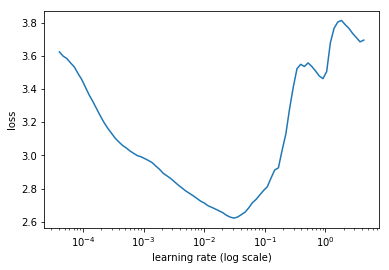

In [17]:
learn.sched.plot()

In [18]:
%time learn.fit(lr, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.809645   1.580666   0.433789  

CPU times: user 1min 5s, sys: 21.8 s, total: 1min 27s
Wall time: 1min 14s


[1.580666, 0.4337890625]

In [19]:
learn.save('8x8_8e1')

In [20]:
%time learn.fit(lr, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.50497    1.434532   0.486052  
    1      1.415007   1.368073   0.510271                 

CPU times: user 2min 11s, sys: 44.3 s, total: 2min 55s
Wall time: 2min 31s


[1.3680726, 0.5102711409330368]

In [21]:
learn.save('8x8_8e2')

In [22]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.354197   1.334107   0.52558   
    1      1.352628   1.315906   0.527223                 
    2      1.217196   1.258691   0.550408                 
    3      1.284034   1.307312   0.531945                 
    4      1.196233   1.24165    0.553326                 
    5      1.077603   1.194678   0.577447                 
    6      0.988323   1.186951   0.582215                  

CPU times: user 8min 14s, sys: 2min 12s, total: 10min 26s
Wall time: 8min 49s


[1.1869509, 0.5822150737047196]

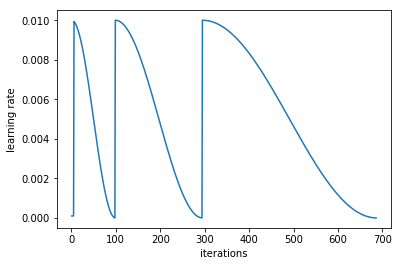

In [23]:
learn.sched.plot_lr()

In [24]:
learn.save('8x8_8e3')

## Playing around with CLR and high learning rates

Test:  
Loading the model from a checkpoint we've saved above (initial model)  
Try to beat the accuracy we've gotten in less epochs  

### Epoch 2 - Test 1: CLR with high LR (.5)

In [48]:
learn.load('8x8_8e1')

In [49]:
lr=5e-1; wd=1e-4

In [50]:
%time learn.fit(lr, 1, cycle_len=2, use_clr=(10, 1), wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.850457   1.582407   0.427102  
    1      1.511062   1.377433   0.500844                 

CPU times: user 2min 19s, sys: 36.9 s, total: 2min 56s
Wall time: 2min 28s


[1.377433, 0.5008444398641586]

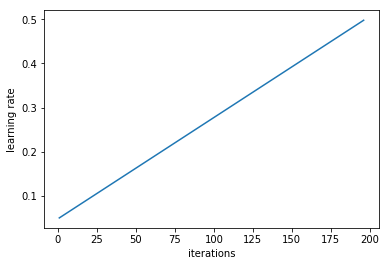

In [40]:
learn.sched.plot_lr()

In [51]:
learn.save('8x8_8e2_clr10-1_highlr')

### Test 2: Run 4 epochs

In [52]:
learn.load('8x8_8e1')

In [53]:
lr=8e-1; wd=1e-4

In [54]:
%time learn.fit(lr, 1, cycle_len=4, use_clr=(10, 1), wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.889845   3.274998   0.359576  
    1      1.52407    1.384474   0.499253                 
    2      1.372817   1.379251   0.497995                 
    3      1.260595   1.217268   0.567894                 

CPU times: user 4min 41s, sys: 1min 18s, total: 5min 59s
Wall time: 5min 1s


[1.2172681, 0.5678940713405609]

In [55]:
learn.save('8x8_8e2_clr10-1_clen4')

### Test 3: Cycle len 6. Out performs "Initial Model". Higher accuracy with less epochs

In [56]:
learn.load('8x8_8e1')

In [57]:
lr=8e-1; wd=1e-4

In [58]:
%time learn.fit(lr, 1, cycle_len=6, use_clr=(10, 2), wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.97695    1.577946   0.419818  
    1      1.579179   1.433      0.481124                 
    2      1.425466   1.309537   0.52492                  
    3      1.283533   1.21617    0.561644                 
    4      1.124753   1.058623   0.624414                 
    5      0.974473   0.945639   0.665711                  

CPU times: user 7min 2s, sys: 1min 53s, total: 8min 55s
Wall time: 7min 31s


[0.9456395, 0.6657111674547196]

In [59]:
learn.save('8x8_8e2_clr10-2_clen6')

### 16x16 - Original

In [23]:
learn.load('8x8_8e2_clr10-2_clen6')

In [99]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  6%|▌         | 6/98 [00:04<01:12,  1.28it/s, loss=1.56]

Exception in thread Thread-103:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                 
    0      1.381085   2.238309   0.431342  



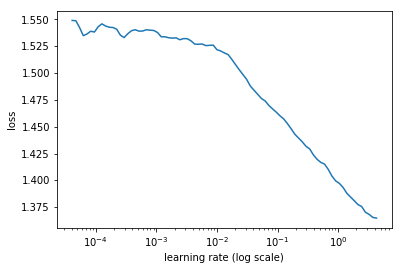

In [100]:
learn.sched.plot()

In [24]:
lr=1e-2; wd=5e-5
learn.unfreeze()

In [25]:
%time learn.fit(lr, 2, cycle_len=1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

  7%|▋         | 7/98 [00:08<01:47,  1.18s/it, loss=1.36]

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                 
    0      1.11208    1.067797   0.614941  
    1      1.029927   0.989437   0.645921                 

CPU times: user 3min 22s, sys: 52.4 s, total: 4min 14s
Wall time: 3min 39s


[0.98943746, 0.6459214150905609]

In [26]:
learn.save('16x16_8e1')

In [18]:
lr=1e-2; wd=5e-5

In [ ]:
learn.unfreeze()
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

In [20]:
learn.save('16x16_8e2')

## 16x16 - Testing high LR

Load the best model we got from above.  
See if we can beat accuracy and speed of the 16x16 training here: https://github.com/fastai/fastai/blob/master/courses/dl1/cifar10.ipynb

In [32]:
learn.load('8x8_8e2_clr10-2_clen6')

In [33]:
learn.set_data(get_data(16,512))

In [107]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 22%|██▏       | 22/98 [00:09<00:31,  2.43it/s, loss=1.53]

Exception in thread Thread-109:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                 
    0      1.357268   2.46283    0.454716  



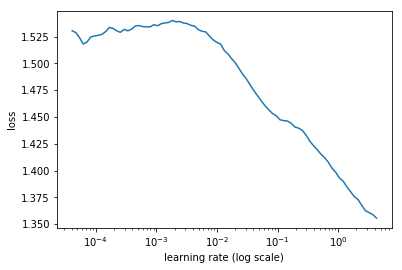

In [108]:
learn.sched.plot()

In [34]:
lr=1; wd=1e-4

In [35]:
# %time learn.fit(1e-3, 1, wds=wd)
learn.unfreeze()
%time learn.fit(lr, 1, cycle_len=6, use_clr=(10, 3), wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

  6%|▌         | 6/98 [00:06<01:47,  1.17s/it, loss=1.26]

Exception in thread Thread-12:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                  
    0      0.945149   1.087072   0.627206  
    1      0.86965    1.153333   0.594956                  
    2      0.752029   0.772384   0.73291                   
    3      0.623311   0.651013   0.777522                  
    4      0.504561   0.535294   0.820186                  
    5      0.402712   0.438307   0.850971                  

CPU times: user 10min 4s, sys: 2min 33s, total: 12min 37s
Wall time: 10min 55s


[0.4383072, 0.8509708166122436]

In [36]:
learn.save('16x16_8_clr10-3_clen6')

## 24x24

In [ ]:
learn.load('16x16_8')

In [ ]:
learn.set_data(get_data(24,bs))

In [ ]:
%time learn.fit(1e-2, 1, wds=wd)

In [ ]:
learn.unfreeze()

In [ ]:
%time learn.fit(lr, 1, cycle_len=1, wds=wd)

In [ ]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

In [ ]:
learn.save('24x24_8')

In [ ]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),0)metrics.log_loss(y,preds), accuracy(preds,y)

## 32x32

In [ ]:
learn.load('24x24_8')

In [ ]:
learn.set_data(get_data(32,bs))

In [ ]:
%time learn.fit(1e-2, 1, wds=wd)

In [ ]:
learn.unfreeze()

In [ ]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

In [ ]:
%time learn.fit(lr, 3, cycle_len=4, wds=wd)

In [ ]:
log_preds,y = learn.TTA()
metrics.log_loss(y,np.exp(log_preds)), accuracy(log_preds,y)

In [ ]:
learn.save('32x32_8')